# Quantum harmonic oscillator

Analogously to the harmonic oscillator from classical physics, the *quantum harmonic oscillator* describes the behaviour of a particle in a potential of the form
$$
V(x) = \frac{1}{2} k x^2 = \frac{1}{2} m \omega^2 x^2.
$$
This is one of the few quantum-mechanical systems for which an exact, analytical solution can be derived. Since an arbitrary potential can be approximated with a harmonic potential in the proximity of a stable equilibrium point, this is a problem worth investigating.

Similar to how Newton's second law $(\vec{F} = m \vec{a})$ is used in classical physics, the Schrödinger equation allows us to make mathematical predictions of a physical system given a set of initial conditions. Here, we look at the (slightly less general) time-independent Schrödinger equation
$$
\hat{H} \psi = E \psi,
$$
where $\psi$ denotes the wave function describing the system, $E$ a to-be determined energy level and $\hat{H}$ the Hamiltonian of the system. From a mathematical point of view, this is just an eigenvalue-equation, where $E$ denotes the eigenvalue and $\psi$ the eigenstate.

As in Hamiltonian mechanics, the Hamiltonian operator corresponds to the total energy energy of the system. It is usually expressed as the sum of the operators corresponding to kinetic and potential energy. Let $m$ be the mass of a particle, $\omega$ the angular frequency of the oscillator, $\hat{x} = x$ the position operator and $\hat{p} = -i\hbar \nabla$ the momentum operator. Then the Hamiltonian of the particle can be written as
$$\hat{H} = \hat{T} + \hat{V} = -\frac{\hbar^2}{2m}\Delta + \frac{m \omega^2}{2}x^2.$$
Plugging this into the Schrödinger equation yields
$$ -\frac{\hbar^2}{2m}\Delta \psi + \frac{m \omega^2}{2}x^2 \psi = E \psi.$$
With the change of variables $\xi = \sqrt{\frac{m\omega}{\hbar}} x$, the equation becomes 
$$\partial_\xi^2 \psi= \left(\xi^2 - \frac{2E}{\hbar \omega}\right) \psi.$$
This differential equation has an exact solution in terms of a quantum number $n \in \mathbb{N}_0$. The eigenstates are given by
$$\psi_n(\xi) = N_n H_n(\xi) e^{-\frac{1}{2}\xi^2}$$
with the corresponding energy level/eigenvalues 
$$E_n = \hbar \omega\left(n + \frac{1}{2} \right),$$
where $N_n$ is the normalization constant $\frac{1}{\sqrt{2^n n!}}\left(\frac{m \omega}{\pi \hbar}\right)^{1/4}$ and $H_n$ denotes the Hermite-polynomial of $n$th order, defined by
$$H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n} e^{-x^2}.$$
The Hermite polynomials satisfy the recursion formula
$$H_{n+1}(x) = 2x H_n(x) - 2nH_{n-1}(x).$$
Hence given the first two Hermite polynomials $H_0 = 1$ and $H_1 = 2x$, we can easily compute the ones up to order $N$ using the function
```python
def make_Hr():
    # Define the Hermite polynomials up to order N by recursion:
    # H_[n] = 2xH_[n-1] - 2(n-1)H_[n-2]
    Hr = [None] * (N + 1)
    # Define first two Hermite polynomials
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    
    for n in range(2, N+1):
        # Hr[1] = 2x
        Hr[n] = Hr[1]*Hr[n-1] - 2*(n-1)*Hr[n-2]
    return Hr
```
The following code plots the wavefunction $\psi$ (```PLOT_PROB = False```) or the corresponding probability density $|\psi|^2$ (```PLOT_PROB = True```) for quantum numbers up to $N = 6$ together with the potential $V$.

### Plots

In [18]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='qho-psi1.png'></td><td><img src='qho-psi2.png'></td></tr></table>"))

,


### Code

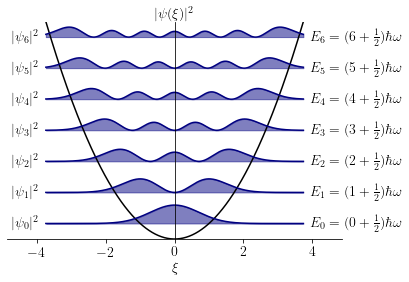

In [19]:
import numpy as np
from matplotlib import rc
import math
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction psi; PLOT_PROB=True plots the density |psi|^2
PLOT_PROB = True

# Maximum quantum number to calculate wavefunction for
N = 6

# Some appearance settings
# Pad the x-axis on each side of the maximum turning points by this fraction
XPAD_FRAC = 1.3
# Scale the wavefunctions so they don't overlap
SCALING = 0.7
# Colors of the wavefunctions
if PLOT_PROB:
    COLOR = 'navy'
else:
    COLOR = 'cornflowerblue'

# Normalization constant and energy level for quantum number n
NORM_CONST = lambda n: 1./np.sqrt(np.sqrt(np.pi)*2**n*math.factorial(n))
get_E = lambda n: n + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order N by recursion:
    # H_[n] = 2xH_[n-1] - 2(n-1)H_[n-2]
    Hr = [None] * (N + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for n in range(2, N+1):
        Hr[n] = Hr[1]*Hr[n-1] - 2*(n-1)*Hr[n-2]
    return Hr

Hr = make_Hr()

def get_psi(n, x):
    """Return the harmonic oscillator wavefunction for level n on grid x."""
    return NORM_CONST(n)*Hr[n](x)*np.exp(-x*x/2.)

def get_turning_points(n):
    """Return the classical turning points for state n."""
    xmax = np.sqrt(2. * get_E(n + 0.5))
    return -xmax, xmax

def get_potential(x):
    """Return potential energy on scaled oscillator displacement grid x."""
    return x**2 / 2


fig, ax = plt.subplots()
xmin, xmax = get_turning_points(N)
zmin, zmax = XPAD_FRAC * xmin, XPAD_FRAC * xmax
x = np.linspace(xmin, xmax, 500)
V = get_potential(x)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve around the offset is filled with COLOR;

    """
    ax.plot(x, f*scaling + yoffset, color=COLOR)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOR, alpha=0.5)
    ax.fill_between(x, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOR, alpha=0.5)

# Plot the potential V(x).
ax.plot(x, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to N.
for n in range(N+1):
    psi_n = get_psi(n, x)
    E_n = get_E(n)
    if PLOT_PROB:
        plot_func(ax, psi_n**2, scaling=SCALING*1.5, yoffset=E_n)
    else:
        plot_func(ax, psi_n, scaling=SCALING, yoffset=E_n)
    # Label energy levels, E = (v+0.5).hbar.omega.
    ax.text(s=r'$E_{{{}}} = ({}+\frac{{1}}{{2}})\hbar\omega$'.format(n,n), x=xmax+0.2,
            y=E_n, va='center')
    # Label the vibrational levels.
    if PLOT_PROB:
         ax.text(s=r'$|\psi_{{{}}}|^2$'.format(n), x=xmin-0.2, y=E_n, va='center', ha='right')
    else:
         ax.text(s=r'$\psi_{{{}}}$'.format(n), x=xmin-0.2, y=E_n, va='center', ha='right')

# Add a bit of space to the top of the plot.
ymax = E_n+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(\xi)|^2$'
else:
    ylabel = r'$\psi(\xi)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel(r'$\xi$')
ax.set_xlim(zmin, zmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('qho-psi{}.png'.format(PLOT_PROB+1),bbox_inches='tight', dpi=300)